In [49]:
import pandas as pd
import numpy as np
import pandas as pd

In [50]:
data = pd.DataFrame(np.random.randint(0, 5, size=(2500, 3)), columns=list('XYZ'))
data['sum'] = data.sum(axis=1)
data.head()

,X,Y,Z,sum
0,0,0,4,4
1,4,4,4,12
2,4,3,3,10
3,4,2,4,10
4,1,3,0,4


# pcalg
## G2検定
・G2検定はデータを離散化する必要がある  
・データの離散化にはpandasのcutが使える  
・離散化する際のカテゴリ数をデータ点数から決定する「スタージェスの公式」

In [51]:
data_size = 100
cpu_usage = np.random.uniform(0, 100, data_size)
df = pd.DataFrame({"cpu-usage": cpu_usage})
df.head()

,cpu-usage
0,93.932835
1,94.574255
2,5.966837
3,71.438086
4,1.085029


In [52]:
# スタージェスの公式でビン数を決定し，離散化する
n_bins = int(np.log2(data_size) + 1)
print("Number of bins: {}".format(n_bins))
discrete_data = pd.cut(df["cpu-usage"], n_bins, labels=np.arange(0, n_bins)) #retbins=True)
discrete_data

Number of bins: 7


0     6
1     6
2     0
3     5
4     0
     ..
95    0
96    5
97    6
98    4
99    4
Name: cpu-usage, Length: 100, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [53]:
df["discrete-cpu-usage"] = discrete_data
df.head()

,cpu-usage,discrete-cpu-usage
0,93.932835,6
1,94.574255,6
2,5.966837,0
3,71.438086,5
4,1.085029,0


In [54]:
# pcalgを使ってみる
import pcalg
import networkx as nx
import numpy as np
from gsq.ci_tests import ci_test_dis
from gsq.gsq_testdata import dis_data

dm = np.array(dis_data).reshape((10000, 5))
(g, sep_set) = pcalg.estimate_skeleton(indep_test_func=ci_test_dis,
                                 data_matrix=dm,
                                 alpha=0.01,
                                 levels=[3,2,3,4,2])
g = pcalg.estimate_cpdag(skel_graph=g, sep_set=sep_set)
g_answer = nx.DiGraph()
g_answer.add_nodes_from([0, 1, 2, 3, 4])
g_answer.add_edges_from([(0, 2), (1, 2), (1, 3), (4, 3)])
print('Edges are:', g.edges(), end='')
if nx.is_isomorphic(g, g_answer):
    print(' => GOOD')
else:
    print(' => WRONG')
    print('True edges should be:', g_answer.edges())

Edges are: [(0, 2), (1, 2), (1, 3), (4, 3)] => GOOD


## Fisher-Z検定

In [55]:
from citestfz.ci_tests import ci_test_gauss

In [28]:
cm = np.corrcoef(dm.T)

(g, sep_set) = pcalg.estimate_skeleton(indep_test_func=ci_test_gauss,
                                 data_matrix=dm,
                                 alpha=0.01,
                                 corr_matrix=cm)
g = pcalg.estimate_cpdag(skel_graph=g, sep_set=sep_set)
g_answer = nx.DiGraph()
g_answer.add_nodes_from([0, 1, 2, 3, 4])
g_answer.add_edges_from([(0, 2), (1, 2), (1, 3), (4, 3)])
print('Edges are:', g.edges(), end='')
if nx.is_isomorphic(g, g_answer):
    print(' => GOOD')
else:
    print(' => WRONG')
    print('True edges should be:', g_answer.edges())

Edges are: [(0, 2), (1, 2), (1, 3), (4, 3)] => GOOD


## 事前知識を入れる

In [84]:
import pcalg
import networkx as nx
from gsq.ci_tests import ci_test_dis
from gsq.gsq_testdata import dis_data

dm = np.array(dis_data).reshape((10000, 5))
node_ids = range(dm.shape[1])
node_ids

range(0, 5)

In [85]:
from itertools import combinations

init_g = nx.Graph()
init_g.add_nodes_from(node_ids)
for (i, j) in combinations(node_ids, 2):
    init_g.add_edge(i, j)

no_paths=[[4, 1], [1, 2]]
for no_path in no_paths:
    init_g.remove_edge(no_path[0], no_path[1])
# nx.nx_agraph.view_pygraphviz(g, prog='fdp')

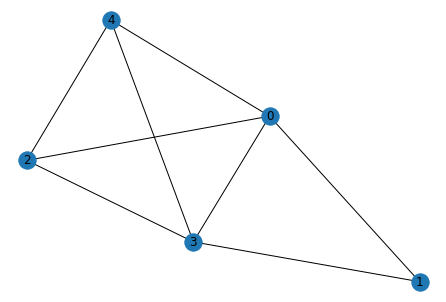

In [86]:
nx.draw(init_g, with_labels=True)

In [88]:
(g, sep_set) = pcalg.estimate_skeleton(indep_test_func=ci_test_dis,
                                 data_matrix=dm,
                                 alpha=0.01,
                                 levels=[3,2,3,4,2],
                                 init_graph=init_g)
g = pcalg.estimate_cpdag(skel_graph=g, sep_set=sep_set)
g_answer = nx.DiGraph()
g_answer.add_nodes_from([0, 1, 2, 3, 4])
g_answer.add_edges_from([(0, 2), (1, 2), (1, 3), (4, 3)])
print('Edges are:', g.edges(), end='')
if nx.is_isomorphic(g, g_answer):
    print(' => GOOD')
else:
    print(' => WRONG')
    print('True edges should be:', g_answer.edges())

Edges are: [(0, 2), (1, 3), (2, 0), (3, 1), (3, 4), (4, 3)] => WRONG
True edges should be: [(0, 2), (1, 2), (1, 3), (4, 3)]


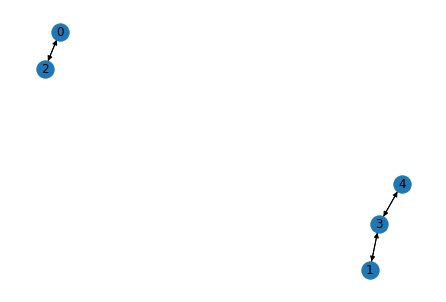

In [89]:
nx.draw(g, with_labels=True)